## The Sparks Foundation
## Data Science and Business Analytics Intern
##  By:Parth Kalsi

## Exploratory Data Analysis - Terrorism

### Find out the hot zone of terrorism
### Derive security issue and insights

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Reading the dataset

In [2]:
data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Cleaning Dataset

In [3]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

### Setting suitable column names 

In [4]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

### Choosing required columns for analysis

In [5]:
data = data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

### Checking for Null Values

In [6]:
data.isnull().sum()

Year               0
Month              0
day                0
Country            0
State            421
Region             0
City             434
latitude        4556
longitude       4557
Attacktype         0
kill           10313
Wound          16311
target1          636
summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

In [7]:
data['Wound'] = data['Wound'].fillna(0)
data['kill'] = data['kill'].fillna(0)

In [8]:
data.describe()

,Year,Month,day,latitude,longitude,kill,Wound
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


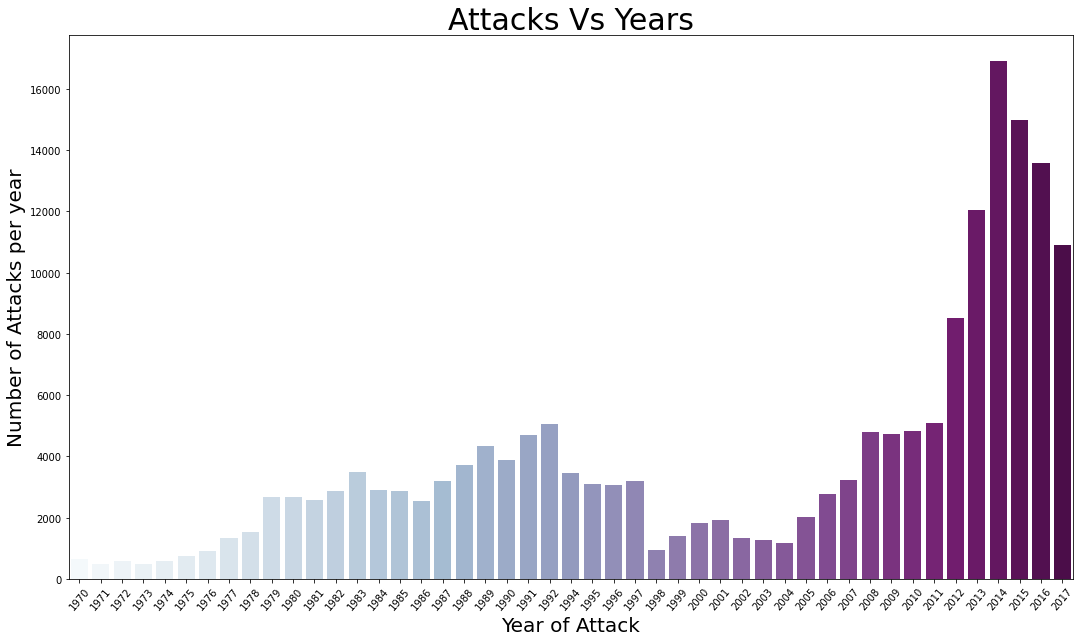

In [9]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year,
           y = years_count,
           palette = "BuPu")
plt.xticks(rotation = 50)
plt.xlabel('Year of Attack',fontsize=20)
plt.ylabel('Number of Attacks per year',fontsize=20)
plt.title('Attacks Vs Years',fontsize=30)
plt.show()

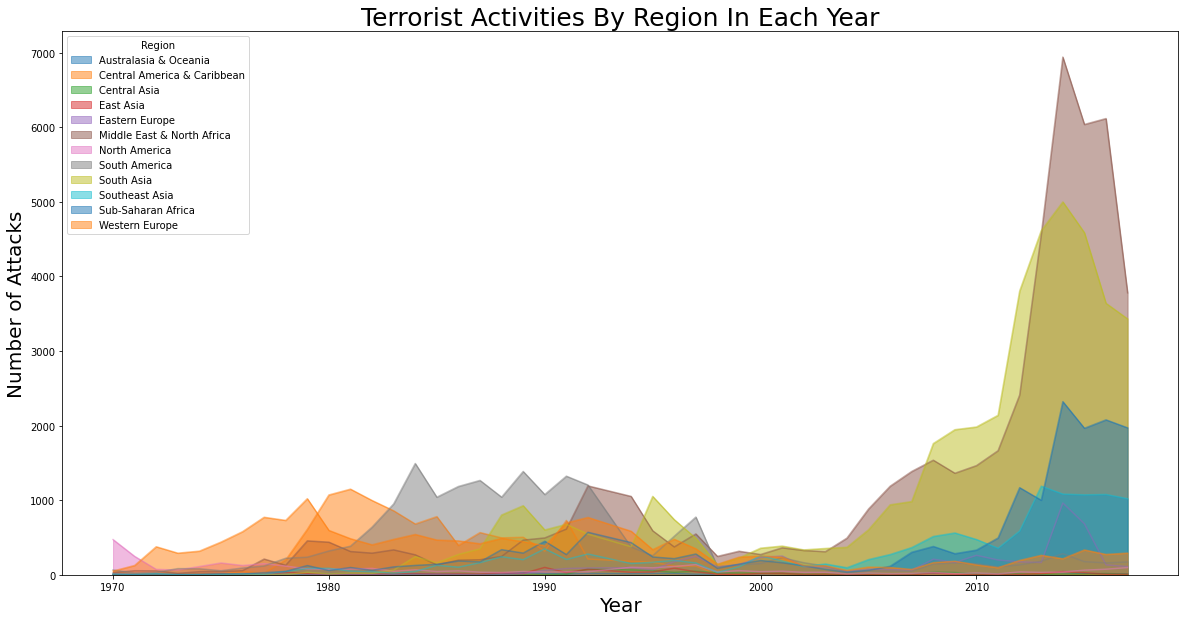

In [10]:
pd.crosstab(data.Year, data.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

### Top Affected Countries

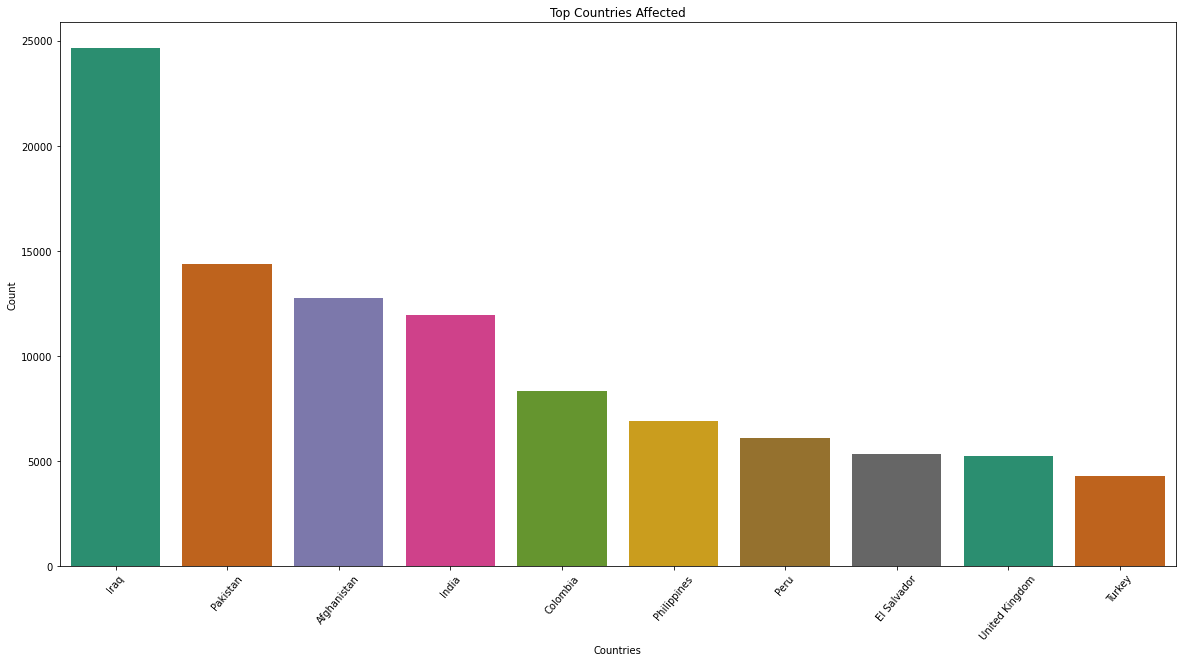

In [11]:
plt.subplots(figsize=(20,10))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,palette="Dark2")
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

### Deaths due to attack

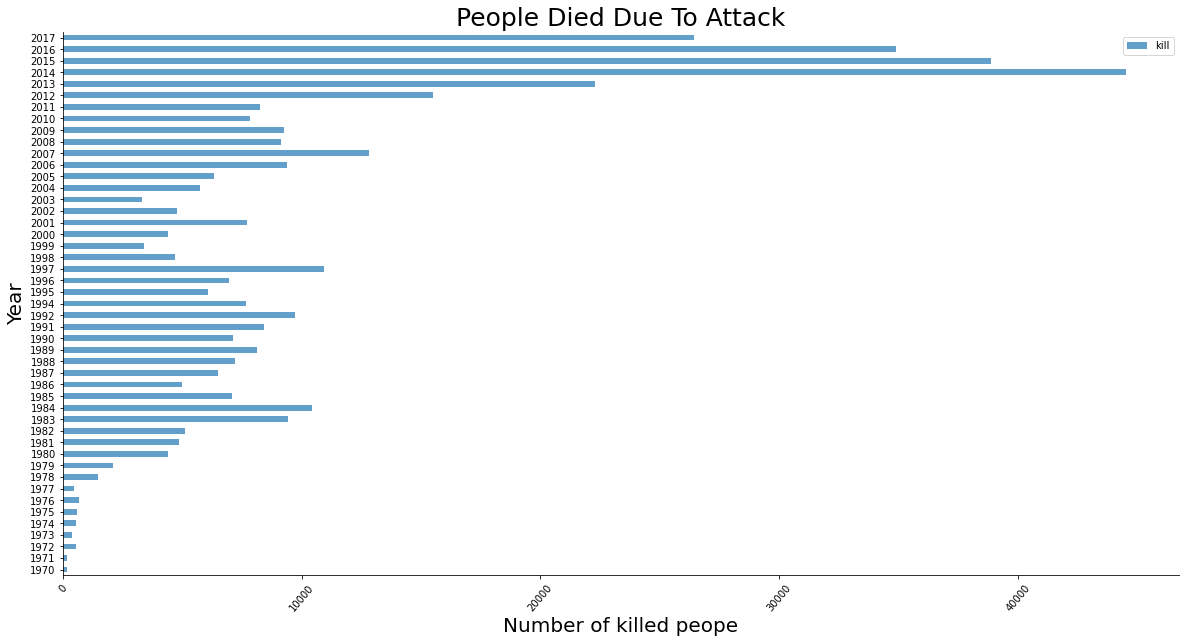

In [12]:
df = data[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='barh',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack",fontsize=25)
plt.xlabel("Number of killed peope",fontsize=20)
plt.ylabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

### Killings with Different Attack Type

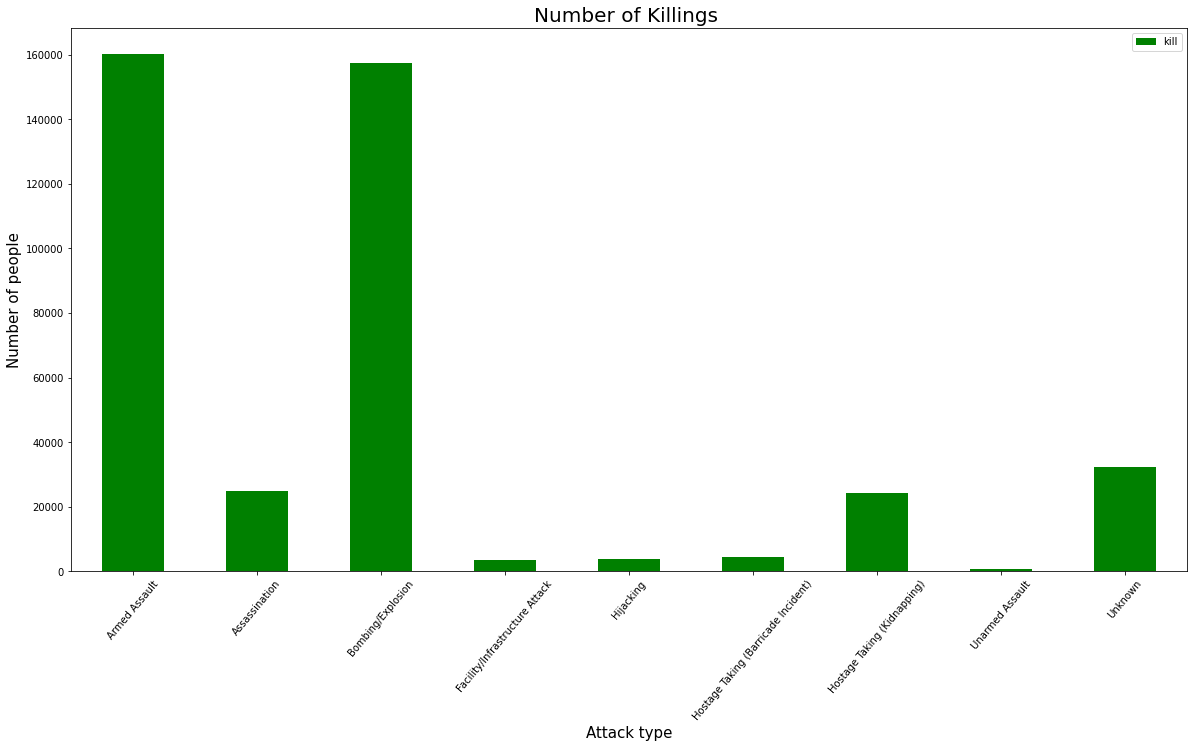

In [13]:
data[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['green'])
plt.xticks(rotation=50)
plt.title("Number of Killings ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

### Places Target type

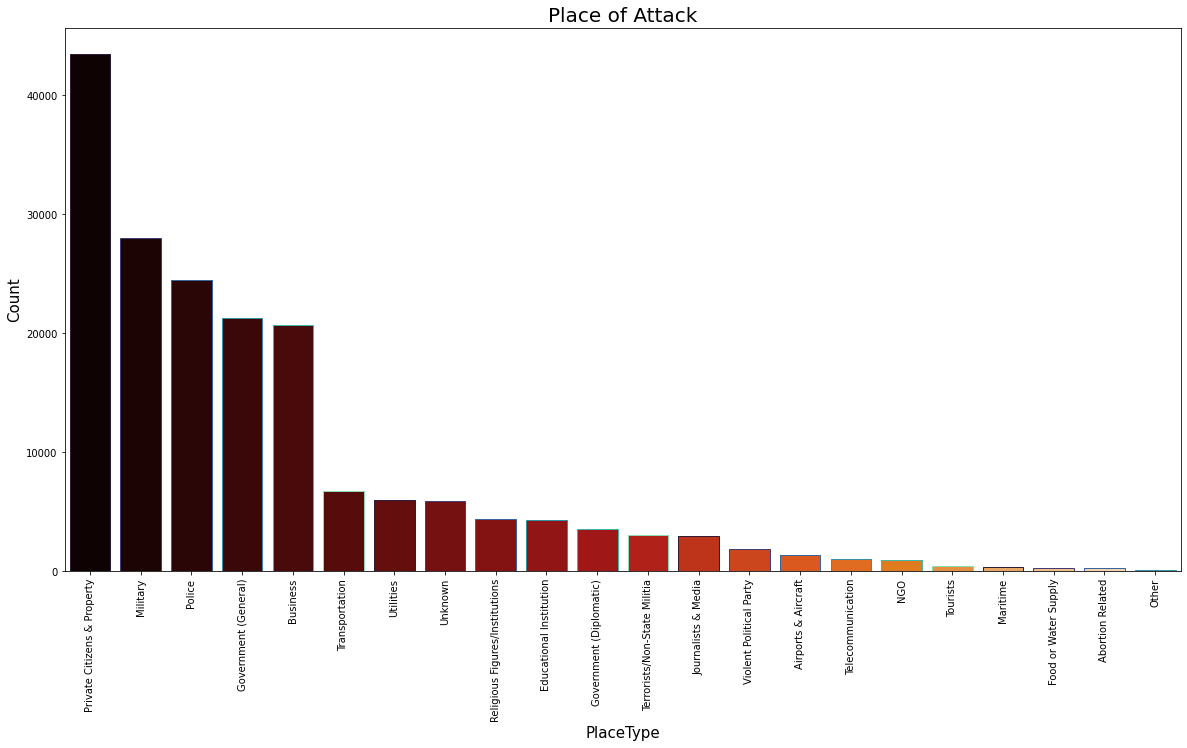

In [14]:
plt.subplots(figsize=(20,10))
sns.countplot(data["Targettype"],order=data['Targettype'].value_counts().index,palette="gist_heat",edgecolor=sns.color_palette("mako"));
plt.xticks(rotation=90)
plt.xlabel("PlaceType",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Place of Attack",fontsize=20)
plt.show()

### Top Terrorist Groups

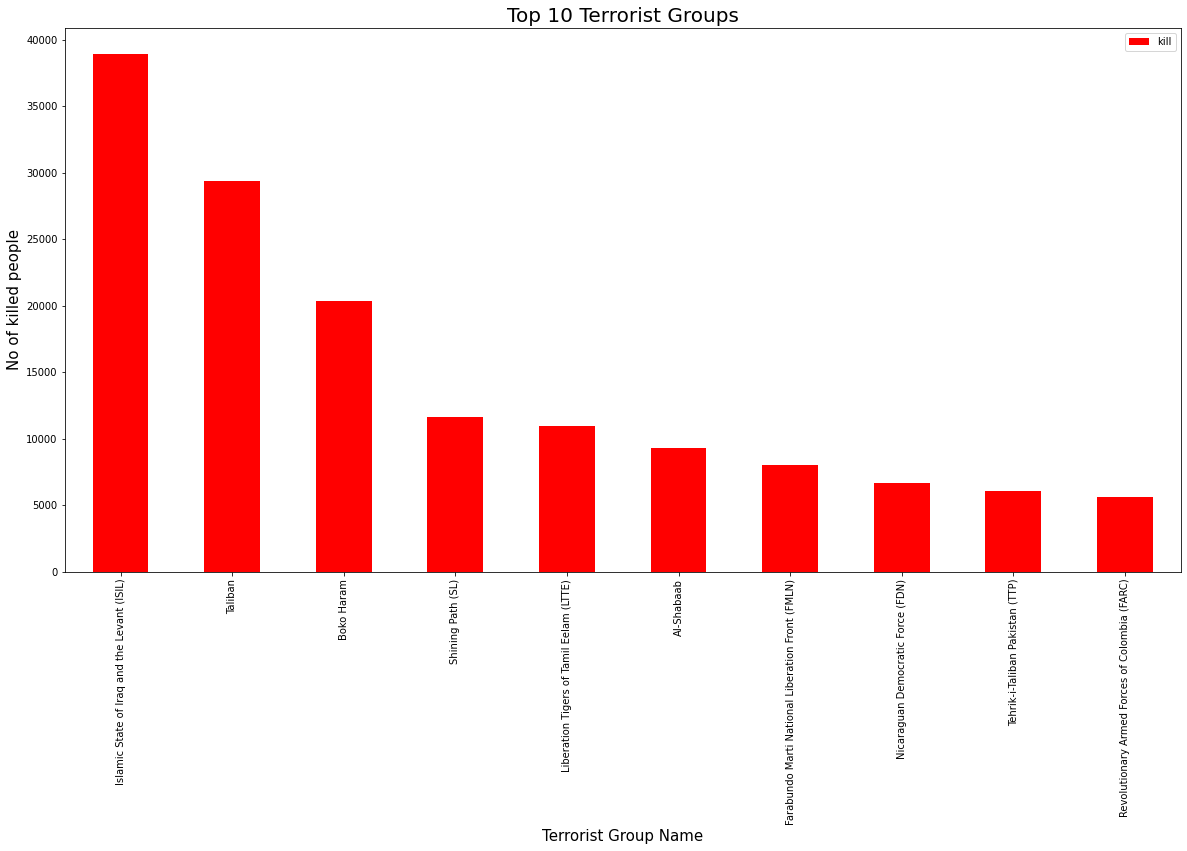

In [15]:
data[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',color='red',figsize=(20,10))
plt.title("Top 10 Terrorist Groups",fontsize=20)
plt.xlabel("Terrorist Group Name",fontsize=15)
plt.ylabel("No of killed people",fontsize=15)
plt.show()

In [16]:
df=data[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df

,Group,Country,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


### Count of different Attack Types

In [17]:
typeKill = data.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
typeKill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


## Analysis

Country most attacked : Iraq

Most affected year : 2014

Maximum deaths in the year: 2014

Global attack rose sharply starting year 2011

Most targetted places are private citizes,military,police etc

Top terrorist attack : Islamic State of Iraq and the Levant (ISIL)